In [1]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("MonApplicationSpark").getOrCreate()

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/10/17 22:49:58 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
23/10/17 22:50:03 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.
23/10/17 22:50:03 WARN Utils: Service 'SparkUI' could not bind on port 4041. Attempting port 4042.


In [6]:
tablecountry = spark.read.csv("result", header=True, inferSchema=True)
nom_column=tablecountry.columns
print(nom_column)

['country', 'avg_TimesRepeated', 'avg_acousticness', 'avg_danceability', 'avg_energy', 'avg_instrumentalness', 'avg_key', 'avg_liveness', 'avg_loudness', 'avg_mode', 'avg_speechness', 'avg_tempo', 'avg_valence', 'avg_year', 'continent']


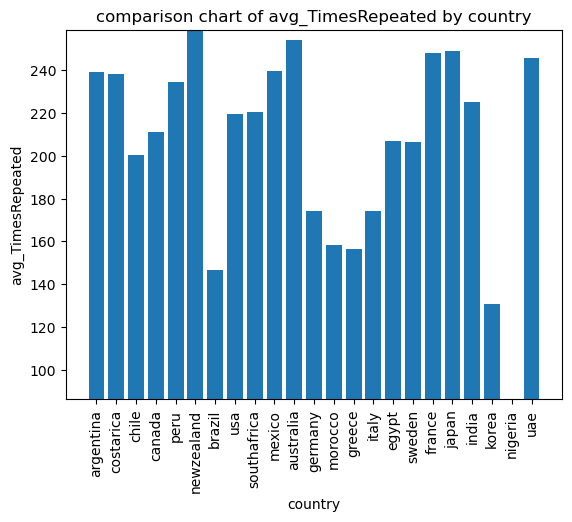

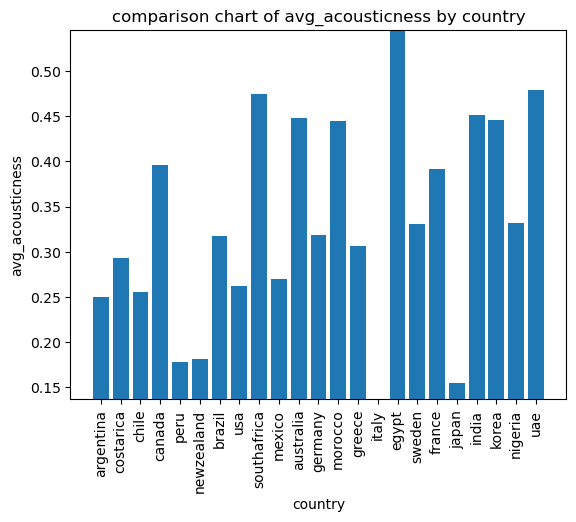

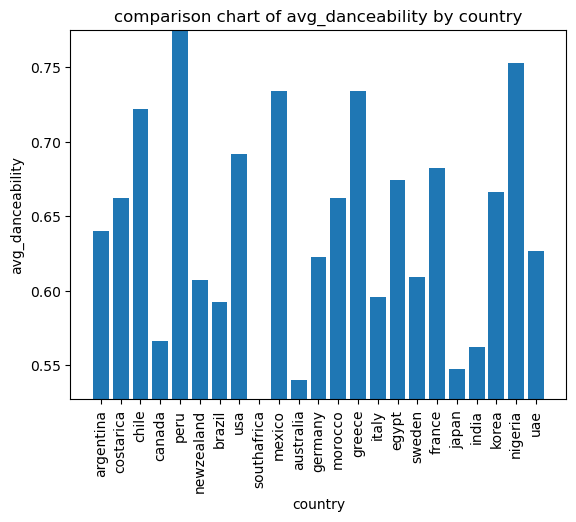

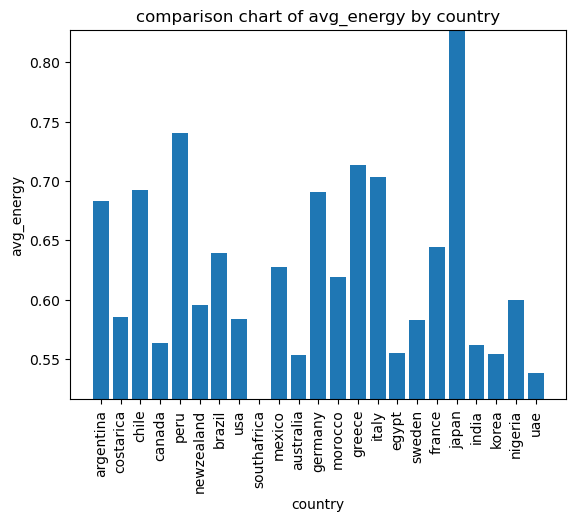

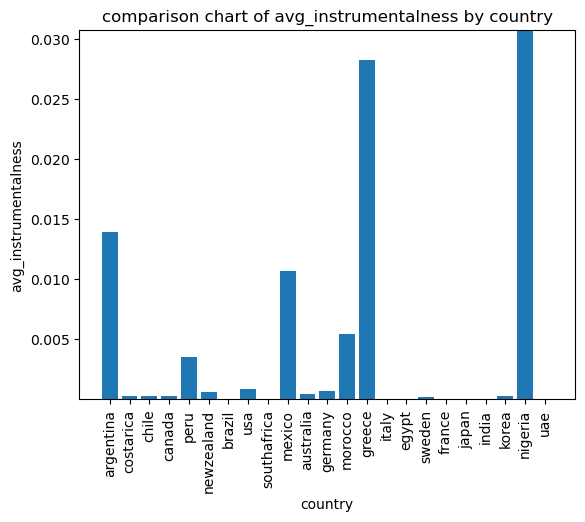

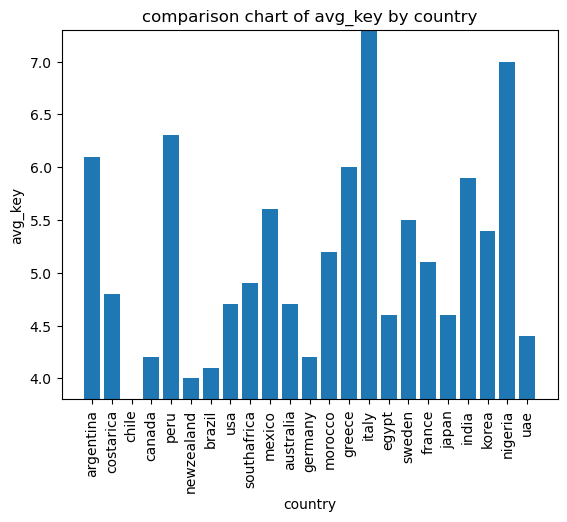

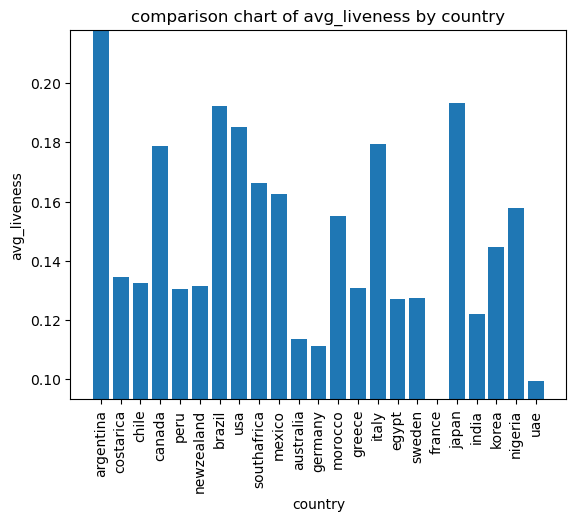

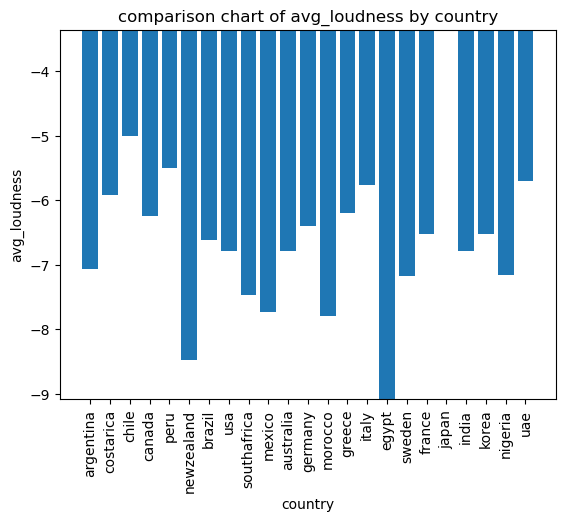

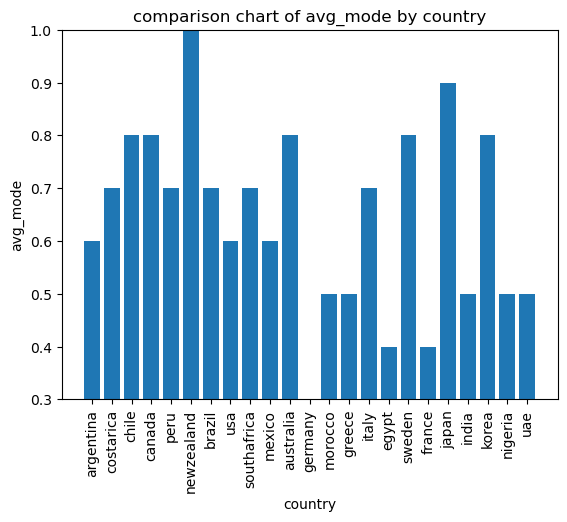

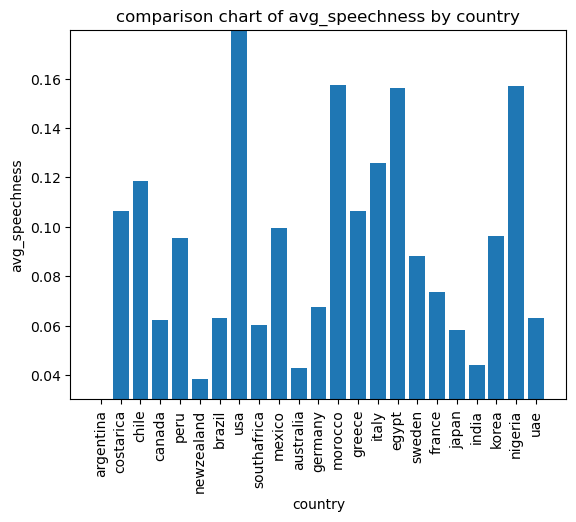

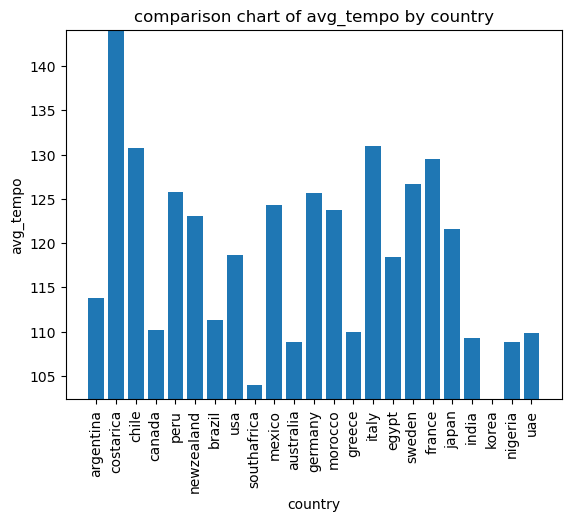

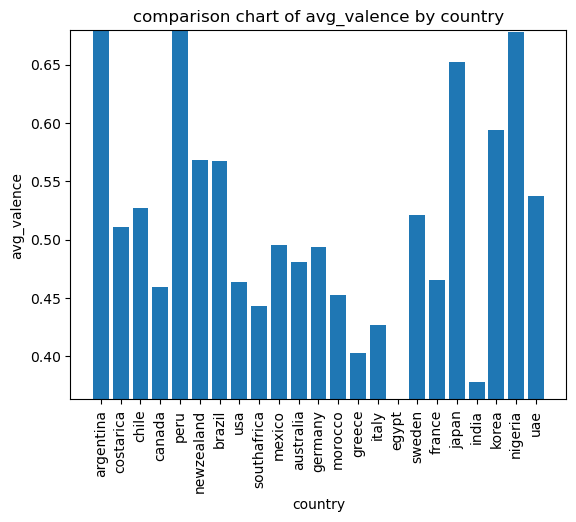

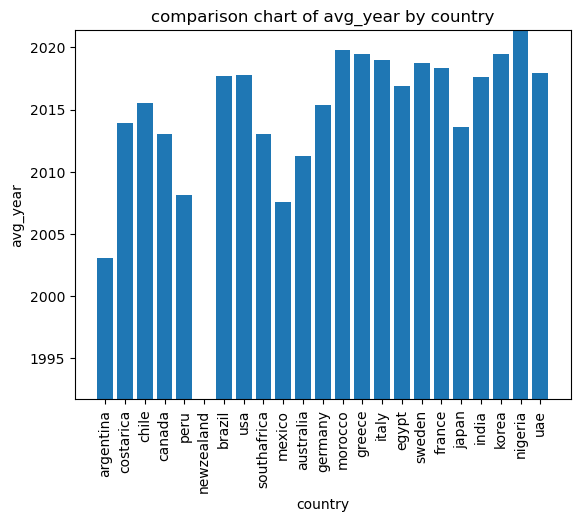

In [13]:
import matplotlib.pyplot as plt
import os
output_directory = 'graphs_country'
if not os.path.exists(output_directory):
    os.makedirs(output_directory)
    
for i in range (1,len(nom_column)-1):
    newtable=tablecountry.select("country",nom_column[i])
    dataframePanda=newtable.toPandas() 
    x_values = dataframePanda['country']
    y_values = dataframePanda[nom_column[i]]

    plt.figure()
    plt.bar(x_values, y_values)
    plt.ylim(min(y_values), max(y_values))

# Ajoutez des étiquettes aux axes et au graphique
    plt.xlabel('country')
    plt.ylabel(nom_column[i])
    plt.title('comparison chart of '+nom_column[i]+' by country')
    plt.xticks(rotation=90)

# Enregistrez le graphique dans le dossier
    graph_filename = os.path.join(output_directory, f'graph_{nom_column[i]}.png')
    plt.savefig(graph_filename, bbox_inches='tight')
    plt.show()
    # Fermez le graphique pour libérer la mémoire
    plt.close()









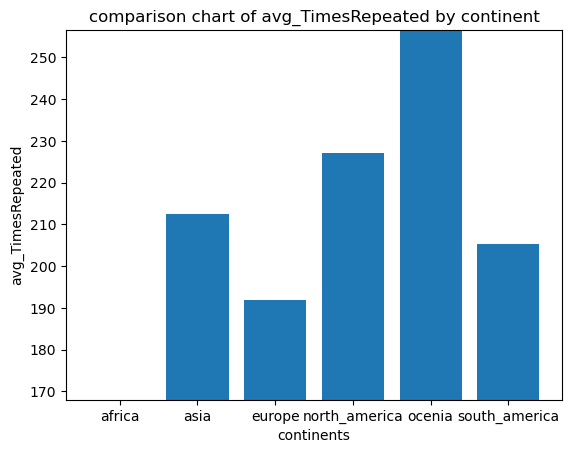

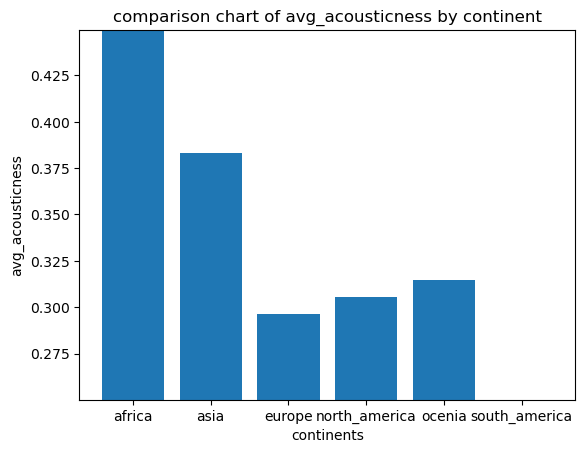

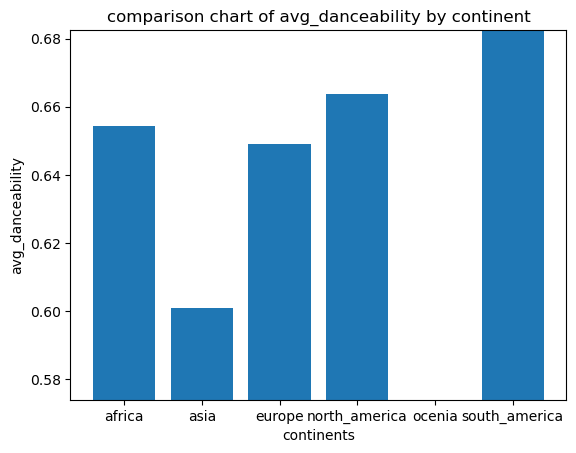

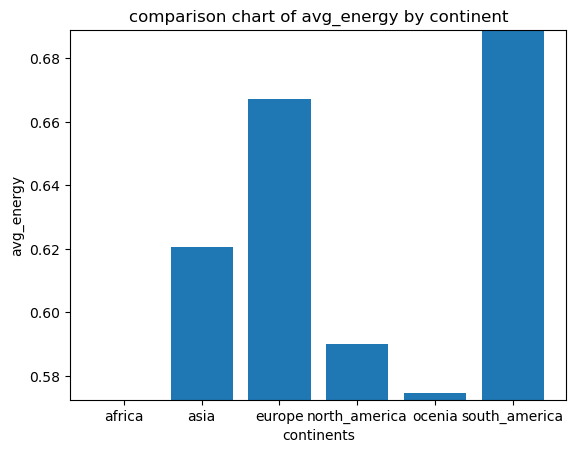

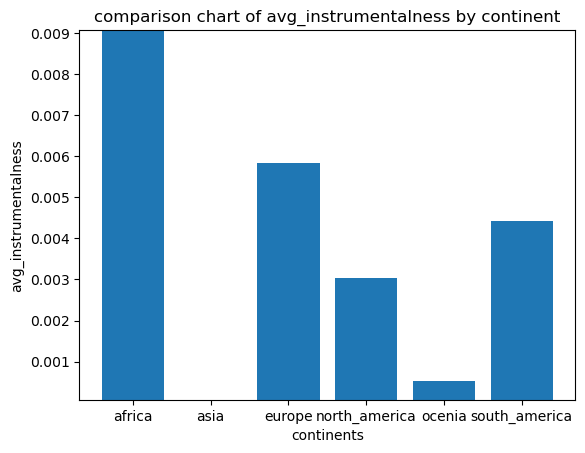

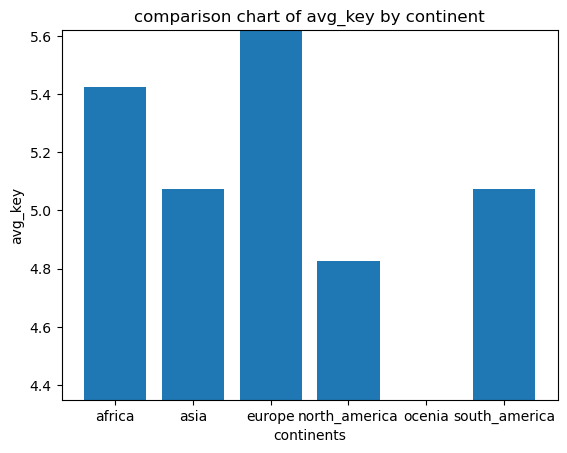

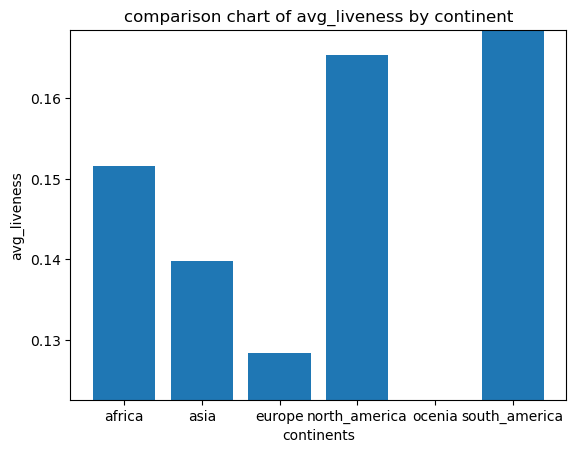

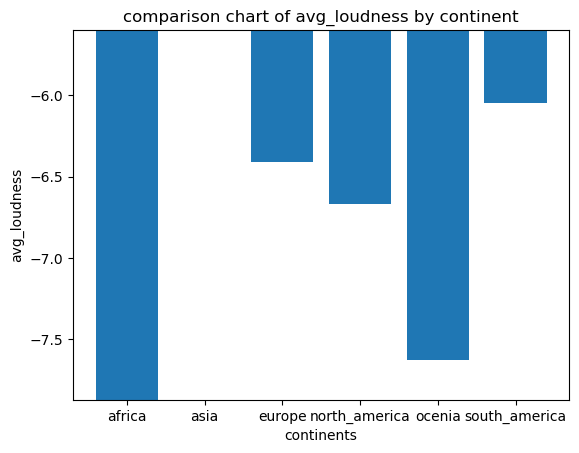

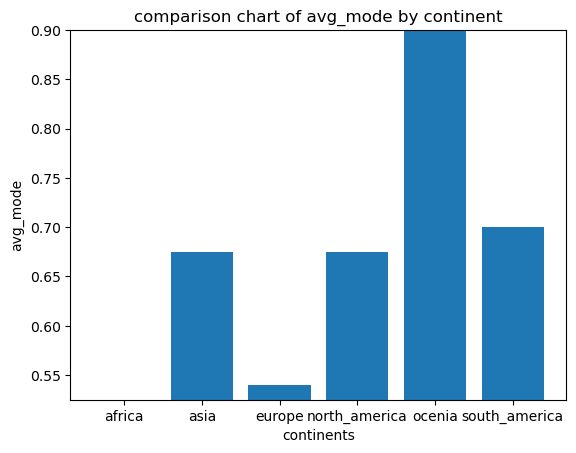

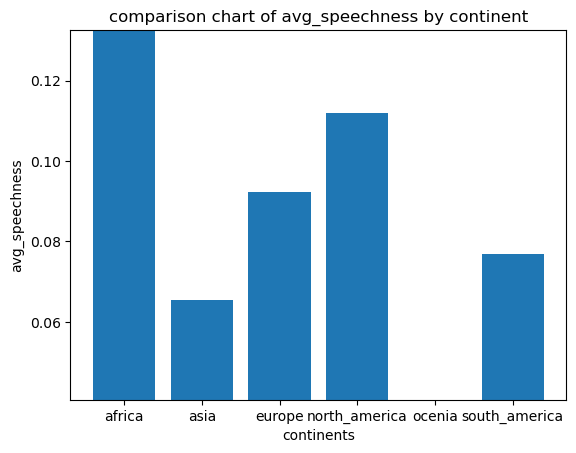

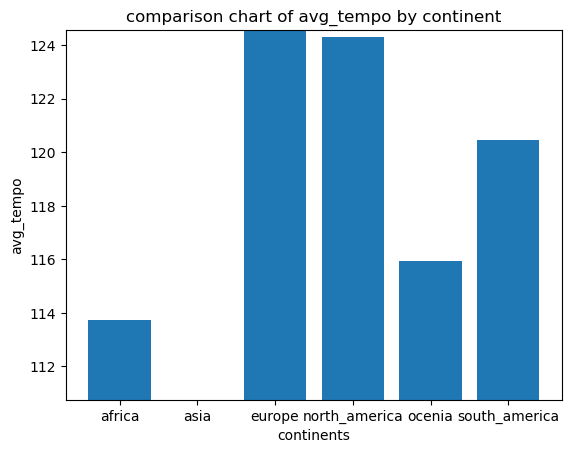

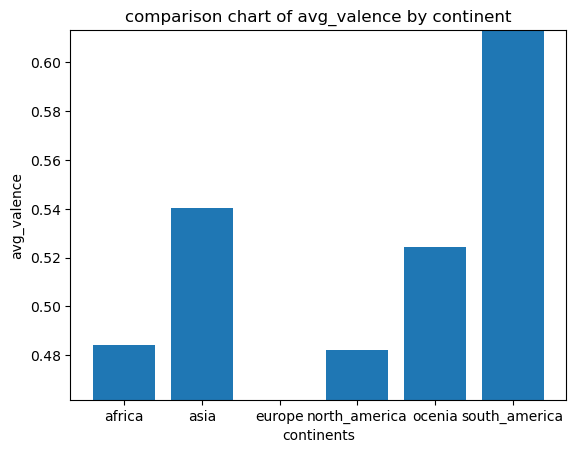

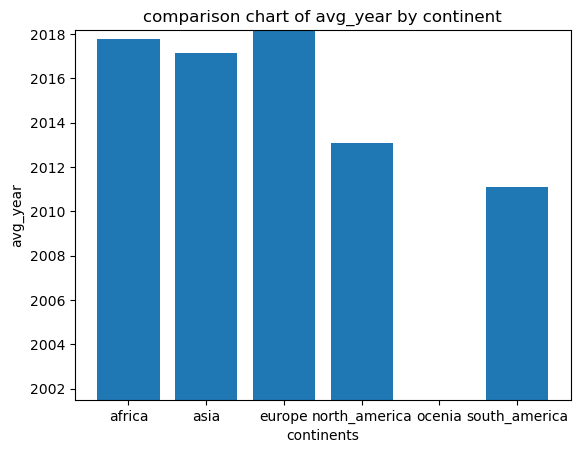

In [14]:
tablecontinent= spark.read.csv("resultcontinent", header=True, inferSchema=True)
import matplotlib.pyplot as plt
import os
output_directory = 'graphs_continent'
if not os.path.exists(output_directory):
    os.makedirs(output_directory)
for i in range (1,len(nom_column)-1):
    newtable=tablecontinent.select("continent",nom_column[i])
    dataframePanda=newtable.toPandas()
    x_values = dataframePanda['continent']
    y_values = dataframePanda[nom_column[i]]
    plt.bar(x_values, y_values)

# Ajoutez des étiquettes aux axes et au graphique
    plt.xlabel('continents')
    plt.ylabel(nom_column[i])
    plt.title('comparison chart of '+nom_column[i]+' by continent')
    plt.ylim(min(y_values), max(y_values))

# Enregistrez le graphique dans le dossier
    graph_filename = os.path.join(output_directory, f'graph_{nom_column[i]}.png')
    plt.savefig(graph_filename, bbox_inches='tight')
    plt.show()
    # Fermez le graphique pour libérer la mémoire
    plt.close()




